[Introduce project here]

In [2]:
# packages needed

import numpy as np
from scipy.signal import convolve
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import pandas as pd
from scipy.signal import deconvolve

Let's practice the fundamental math/coding skills you'll need moving forward. For the software side of this project, you'll need to be familiar with

1. Convolutions/Deconvolutions
2. Fourier transforms
3. xxx

Let's start with convolutions in the time domain to understand how the operation works on synthetic data.

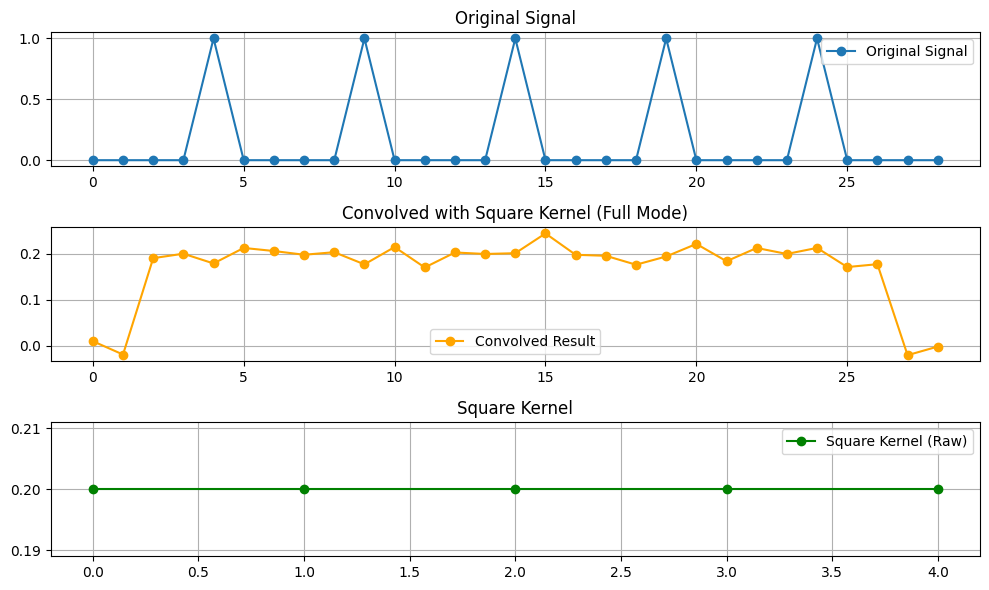

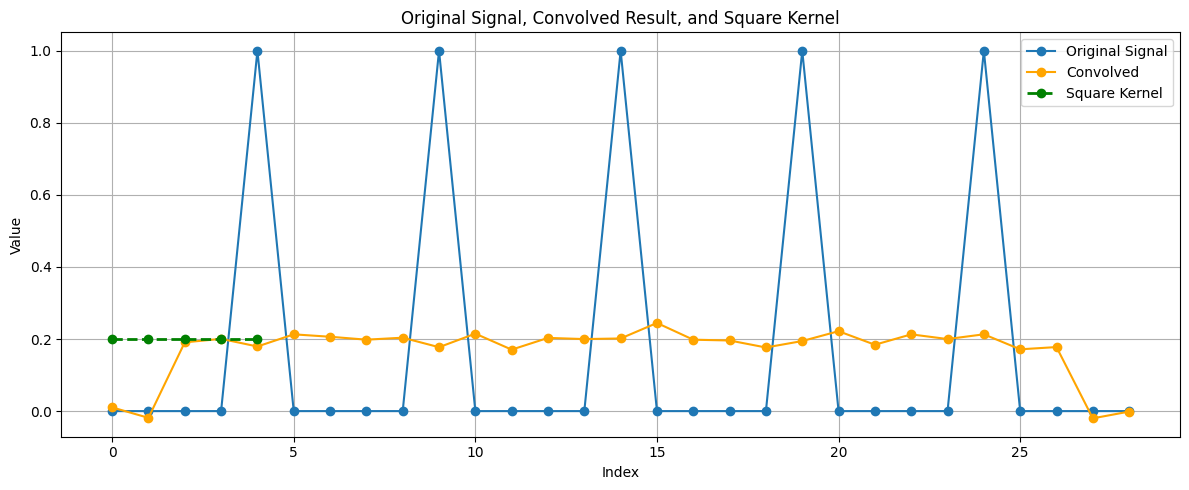

Square Kernel: [0.2 0.2 0.2 0.2 0.2]
Convolved Result: [0.  0.  0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.  0. ]


In [3]:

# Here, we will look at fake "heatbeat" data:
#   - x_square = when a heartbeat is occuring (0 for no, 1 for "yes, a heartbeat occured here")
#   - square_kernel = the kernel to convolve with the heartbeat data
#   - 


# 1 when heartbeat occurs
x_square = np.array([  
    0, 0, 0, 0, 1, 
    0, 0, 0, 0, 1, 
    0, 0, 0, 0, 1, 
    0, 0, 0, 0, 1, 
    0, 0, 0, 0, 1, 
    0, 0, 0, 0
])

# square wave
kernel_size = 5  # length 5
square_kernel = np.ones(kernel_size) / kernel_size  # 0.2 for all values here, square wave h
h_square = square_kernel  # this is our goal in long run, "can we get h" from x and y (heart beat measurements from PPG)

# when we convolve on the first value of x, we'll get:
# array: [0, 0, 0, 0, 1]
# kernel = [0.2, 0.2, 0.2, 0.2, 0.2]
# multiply: 0*0.2 + 0*0.2 + 0*0.2 + 0*0.2 + 1*0.2 = 0.2 = convolved value

# convolution
y_square = convolve(x_square, h_square, mode='same')  # show the extra values before we fully align the sliding window
# change to mode="same" to have the output be same size as x, centered w/ respect to full output
# change to mode="full" to get the output to be a full discrete lin combo of inputs (default)

# add noise to simulate sensor innacuracy (not necessary though)
noise = 0.02
noisy_y_square = y_square + np.random.normal(0, noise,size=y_square.shape)

# plot
fig, axs = plt.subplots(3, 1, figsize=(10, 6), sharex=False)

# Plot original signal
axs[0].plot(x_square, label="Original Signal", marker='o')
axs[0].set_title("Original Signal")
axs[0].grid(True)
axs[0].legend()

# Plot convolved result
axs[1].plot(noisy_y_square, label="Convolved Result", marker='o', color='orange')
axs[1].set_title("Convolved with Square Kernel (Full Mode)")
axs[1].grid(True)
axs[1].legend()

# Plot the square kernel as-is
axs[2].plot(h_square, label="Square Kernel (Raw)", marker='o', color='green')
axs[2].set_title("Square Kernel")
axs[2].grid(True)
axs[2].legend()

plt.tight_layout()
plt.show()

# plots on same graph
plt.figure(figsize=(12, 5))

# original signal
plt.plot(np.arange(len(x_square)), x_square, label="Original Signal", marker='o', linewidth=1.5)

# convolved result
plt.plot(np.arange(len(noisy_y_square)), noisy_y_square, label="Convolved", marker='o', color='orange', linewidth=1.5)

# raw kernel (plotted starting at index 0)
plt.plot(np.arange(len(h_square)), h_square, label="Square Kernel", marker='o', color='green', linewidth=2, linestyle='--')

plt.title("Original Signal, Convolved Result, and Square Kernel")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# print kernel and result
print("Square Kernel:", h_square)
print("Convolved Result:", y_square)

Analyze the graphs and printed outputs. Do these results make sense to you? Could you explain these results to Parker? 

Once you're comfortable with these results, let's try one more example. This time, let's use a gaussian kernel.

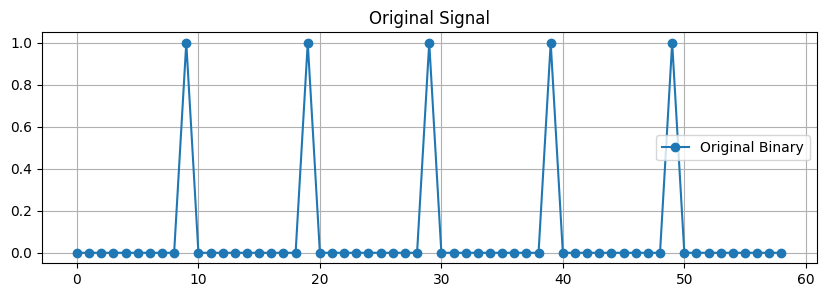

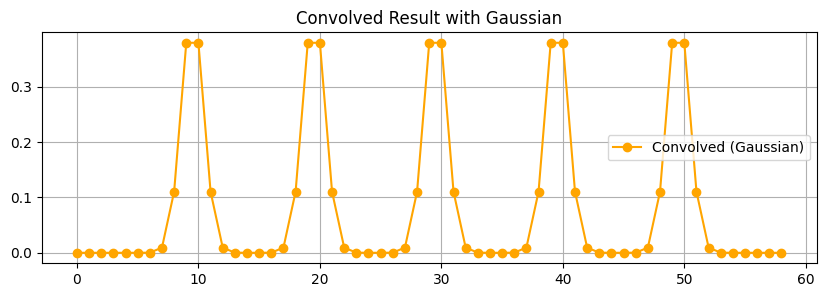

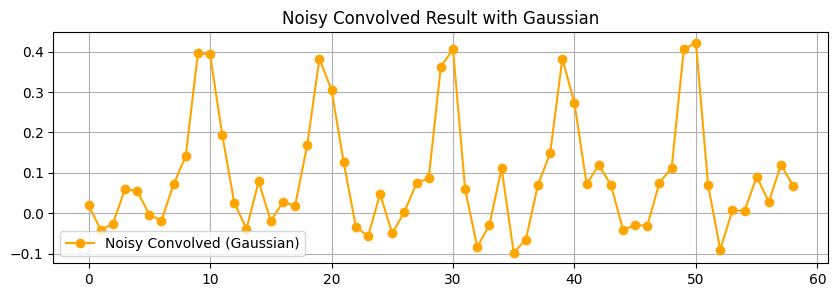

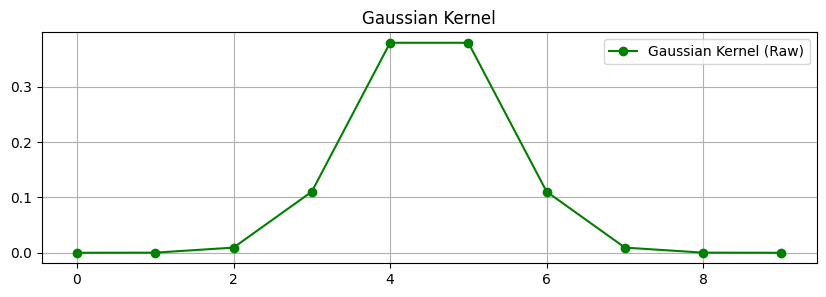

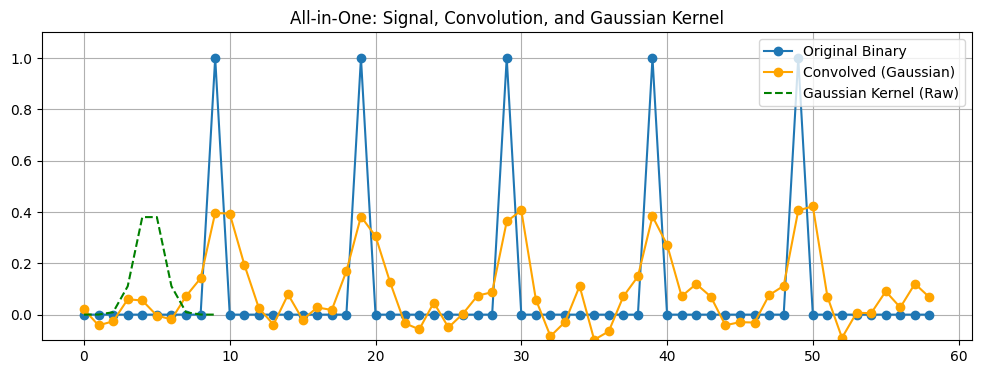

Gaussian Kernel: [1.65191096e-06 2.30489286e-04 9.35726273e-03 1.10530180e-01
 3.79880416e-01 3.79880416e-01 1.10530180e-01 9.35726273e-03
 2.30489286e-04 1.65191096e-06]
Convolved Result: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.65191096e-06 2.30489286e-04 9.35726273e-03
 1.10530180e-01 3.79880416e-01 3.79880416e-01 1.10530180e-01
 9.35726273e-03 2.30489286e-04 1.65191096e-06 1.65191096e-06
 2.30489286e-04 9.35726273e-03 1.10530180e-01 3.79880416e-01
 3.79880416e-01 1.10530180e-01 9.35726273e-03 2.30489286e-04
 1.65191096e-06 1.65191096e-06 2.30489286e-04 9.35726273e-03
 1.10530180e-01 3.79880416e-01 3.79880416e-01 1.10530180e-01
 9.35726273e-03 2.30489286e-04 1.65191096e-06 1.65191096e-06
 2.30489286e-04 9.35726273e-03 1.10530180e-01 3.79880416e-01
 3.79880416e-01 1.10530180e-01 9.35726273e-03 2.30489286e-04
 1.65191096e-06 1.65191096e-06 2.30489286e-04 9.35726273e-03
 1.10530180e-01 3.79880416e-01 3.79880416e-01 1.10530180e-01
 9.35726273e-03 2.

In [4]:
# heartbeat frequency
x_gaussian = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
                         0, 0, 0, 0, 0, 0, 0, 0, 0])

# gaussian kernel
def make_gaussian(size, sigma):
    x = np.linspace(-size // 2, size // 2, size)
    gauss = np.exp(-x ** 2 / (2 * sigma ** 2))
    return gauss / gauss.sum()  # normalize

kernel_size = 10
sigma = 1
gaussian_kernel = make_gaussian(kernel_size, sigma)
h_gaussian = gaussian_kernel

# convolve
convolved_result = convolve(x_gaussian, gaussian_kernel, mode='same')

noise_gaussian = 0.05
noisy_y_gaussian = convolved_result + np.random.normal(0, noise_gaussian, size=convolved_result.shape)

# plot original signal
plt.figure(figsize=(10, 3))
plt.plot(x_gaussian, label="Original Binary", marker='o')
plt.title("Original Signal")
plt.grid(True)
plt.legend()
plt.show()

# plot convolved result
plt.figure(figsize=(10, 3))
plt.plot(convolved_result, label="Convolved (Gaussian)", marker='o', color='orange')
plt.title("Convolved Result with Gaussian")
plt.grid(True)
plt.legend()
plt.show()

# plot noisy convolved result
plt.figure(figsize=(10, 3))
plt.plot(noisy_y_gaussian, label="Noisy Convolved (Gaussian)", marker='o', color='orange')
plt.title("Noisy Convolved Result with Gaussian")
plt.grid(True)
plt.legend()
plt.show()

# plot gaussian kernel
plt.figure(figsize=(10, 3))
plt.plot(gaussian_kernel, label="Gaussian Kernel (Raw)", marker='o', color='green')
plt.title("Gaussian Kernel")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(x_gaussian, label="Original Binary", marker='o')
plt.plot(noisy_y_gaussian, label="Convolved (Gaussian)", marker='o', color='orange')
plt.plot(np.arange(len(gaussian_kernel)), gaussian_kernel, label="Gaussian Kernel (Raw)", linestyle='--', color='green')
plt.title("All-in-One: Signal, Convolution, and Gaussian Kernel")
plt.grid(True)
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()

# print actual values
print("Gaussian Kernel:", gaussian_kernel)
print("Convolved Result:", convolved_result)

Again, look over the code and output. Make sure you have a strong mental model for what the convolution operator and its output.

Now, let's take a look at these operations with real sensor data from Parker himself! Make sure you have the biosignals.csv downloaded, as it's needed for this part.

We often use PPG and ECG data in this project. These are two types of sensors that measure differnet things.

PPG (gives us pulse waveform): 
- measures changes in blood volume in the microvascular bed of tissue.
- a light source shines into the skin, and a photodetector measures how much light is absorbed or reflected. As blood pulses through the vessels with each heartbeat, the amount of absorbed/reflected light changes.

ECG (gives us heart rate/rhythm):
- measures the electrical activity of the heart during each heartbeat.
- electrodes placed on the skin detect electrical impulses generated by the depolarization and repolarization of cardiac muscle.

Run the code block below. Could you explain why each graph corresponds to its respective signal?


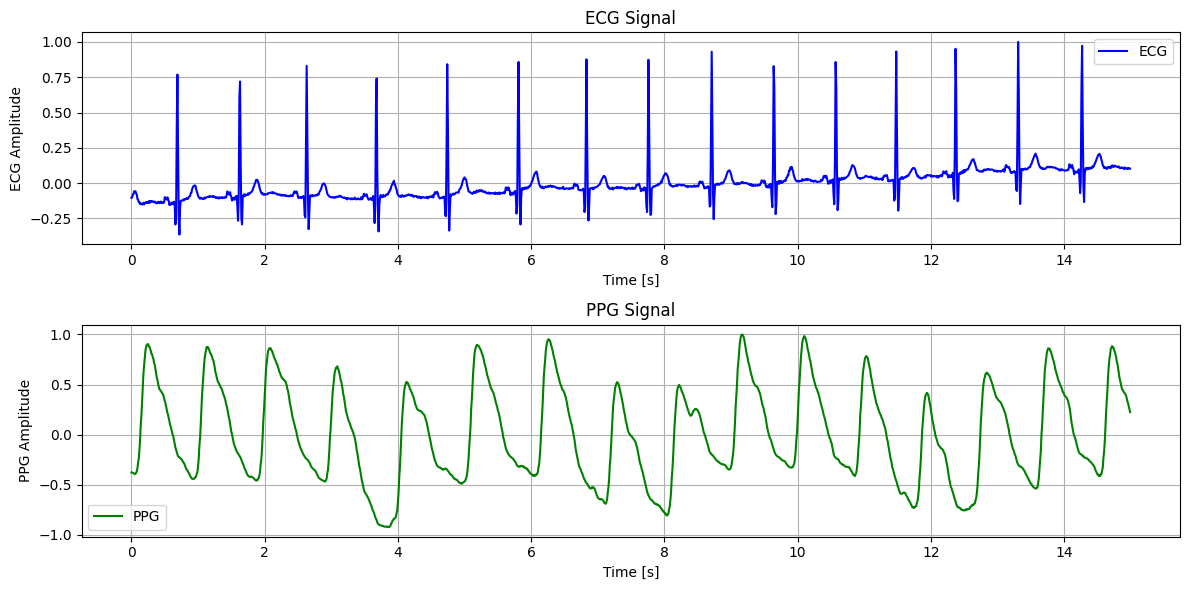

In [5]:
df = pd.read_csv('biosignals.csv')

# plot ECG and PPG with time
plt.figure(figsize=(12, 6))

# plot ECG
plt.subplot(2, 1, 1)
plt.plot(df['t'], df['ecg'], label='ECG', color='b')
plt.title('ECG Signal')
plt.xlabel('Time [s]')
plt.ylabel('ECG Amplitude')
plt.grid(True)
plt.legend()

# plot PPG
plt.subplot(2, 1, 2)
plt.plot(df['t'], df['ppg'], label='PPG', color='g')
plt.title('PPG Signal')
plt.xlabel('Time [s]')
plt.ylabel('PPG Amplitude')
plt.grid(True)
plt.legend()

plt.tight_layout()

plt.show()

Let's now use this data to do a similar type of convolution that we were doing before. 

Remember, one of our overall project goals is to get the "single heartbeat kernel" by itself, and then use that to recreate PPG/ECG wave data to confirm if that single heartbeat kernel is accurate or not in representing a person's heartbeats. Choosing how to represent that single heartbeat kernel is very difficult (how many paramaters should the function have, etc). In this example, we'll cheat a little bit and crop a portion of the PPG wave to simulate a single heartbeat kernel (not a very sound way to do it but will work for the purposes of this tutorial). This example below will be in the frequency domain, but many of the concepts and math is the same when you move into the time domian.

Before you run the code below, make sure you have the binary_ecg_output.txt file downloaded

Average interval between heartbeats in ms: 0.97


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


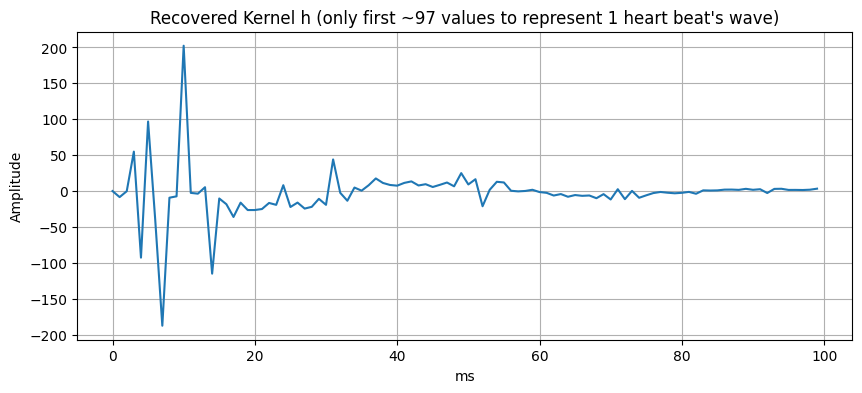

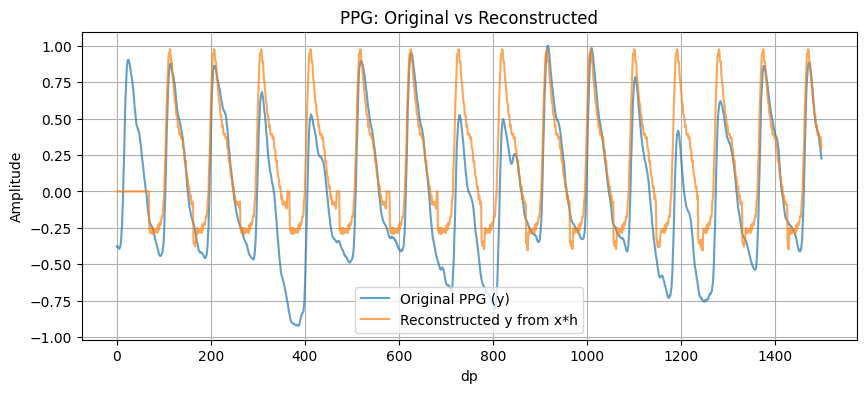

In [7]:
# we want:
# x = ecg
# y = ppg
# h = GOAL, we want to see what 1 wave looks like and then see if we
# can reconstruct x and y with it

# get all the 99% peaks of the ecg data
# then turn those peak values into 1s and all other values into 0
# this gave me a .txt file with 15 1s and roughly 1485 0s. We naively
# mimic the ECG data by doing this. Makes computation/visuals easier.
binary_ecg = np.loadtxt('binary_ecg_output.txt')

# get all the ppg values from the biosignals df
ppg = df['ppg'].values

# padding for fft
n = len(ppg)
N = 2 ** int(np.ceil(np.log2(n)))
x_padded = np.pad(binary_ecg, (0, N - len(binary_ecg)))
y_padded = np.pad(ppg, (0, N - len(ppg)))

# get ffts
X = np.fft.fft(x_padded)
Y = np.fft.fft(y_padded)

# bc binary ecg values (we have mostly zeros), use small epsilon for noise
eps = 1e-15
X_eps = np.where(np.abs(X) < eps, eps, X)

# solve for H in freq domain
# bc we did fft, our convolution is simply 
# X times H = y, solve for H
H = Y / X_eps

# inverse fft to get h in time domain
h = np.fft.ifft(H).real  # time domain
h = h[:1500]
h_100 = h[:100]
h_100_padded = np.pad(h_100, (0, N - len(h_100)))

# reconstruct y from x and recovered h
Y_test = np.fft.ifft(np.fft.fft(x_padded) * np.fft.fft(h_100_padded)).real

###########

# we want to see what 1 h looks like, not all of them together.
# for simplicity, take the first heartbeat's h and apply it to
# the rest of the data

# find viewing window for H
heartbeat_times = np.array([0.69,  1.63,  2.63,  3.68,  4.74,  5.81,  6.83,  7.76,  8.71,  9.64, 10.57, 11.48, 12.37, 13.31, 14.27])

intervals = np.diff(heartbeat_times)

# calculate the average interval between heartbeats
avg_interval = np.mean(intervals)
print(f"Average interval between heartbeats in ms: {avg_interval}")

# avg interval = .97 seconds
sampling_rate = 100
avg_interval_ms = 0.97 * 100

##########

# plot recovered h
plt.figure(figsize=(10, 4))
plt.plot(H[:100])  # show first ~97 values
plt.title("Recovered Kernel h (only first ~97 values to represent 1 heart beat's wave)")
plt.xlabel("ms")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# plot original vs reconstructed PPG
plt.figure(figsize=(10, 4))
plt.plot(df['ppg'], label='Original PPG (y)', alpha=0.7)
plt.plot(Y_test[:1500], label='Reconstructed y from x*h', alpha=0.7)
plt.title("PPG: Original vs Reconstructed")
plt.xlabel("dp")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

Using a PPG cropped h, we get a pretty solid recreation of the PPG signal. Nice! Make sure you understand the code, but more importantly the math, behind what took place in this example. Going forward, we'll just be in the time domain but freq domain gives us a nice way of really seeing the convolutions and how x, h, and y are connected.

As we saw, just cropping a portion of the PPG waves and calling that h didn't lead to a super accurate representation of the data. How do we find a better way to represent h?

We can use machine learning to find the best parameters for a given function, h.

Here's the approach we will use.

We will use NumPyro. NumPyro is a lightweight probabilistic programming library built on top of JAX (a high-performance numerical computing library).

What is NumPyro used for?
- to define and run Bayesian probabilistic models, allowing you to:
    - Perform Bayesian inference using MCMC (e.g., NUTS, HMC).
    - Do variational inference (approximate Bayesian inference).
    - Build flexible generative models for uncertain data.
    - Perform Bayesian machine learning and statistical modeling.

Within NumPyro, we will use MCMC. 

At a high level:
- MCMC builds a Markov chain where each new sample depends only on the previous one.
- Over time, this chain converges to the desired probability distribution (e.g. a Bayesian posterior).
- By drawing many samples, we can approximate expectations, marginals, or make probabilistic predictions.

What is MCMC good for?
- MCMC is especially useful in Bayesian inference, where we often want to compute P(𝜃 | data) = (P(data | 𝜃) * P(𝜃)) / P(data)
- The denominator is intractable so MCMC lets us sample from the posterior, aka (P(data | 𝜃) * P(𝜃)), without computing it directly.


MCMC in NumPyro will be our tool to learn the parameters for h, but we still don't exactly know what h looks like/what function and parameters we should use to represent it. Let's just get some practice in with MCMC first. Let's pretend that h is a guassian with only two parameters, an amplitude and a width.

In this example, we'll learn how to work with NumPyro and MCMC, as well as the importance of priors on h.

In [8]:
import jax
import jax.numpy as jnp
import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS
import matplotlib.pyplot as plt
import seaborn as sns

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


sample: 100%|██████████| 1500/1500 [00:02<00:00, 570.67it/s, 3 steps of size 8.14e-01. acc. prob=0.92] 



                mean       std    median      5.0%     95.0%     n_eff     r_hat
        mu      2.60      0.22      2.60      2.24      2.99   1083.36      1.00
     sigma      5.02      0.16      5.01      4.79      5.30    701.37      1.00

Number of divergences: 0


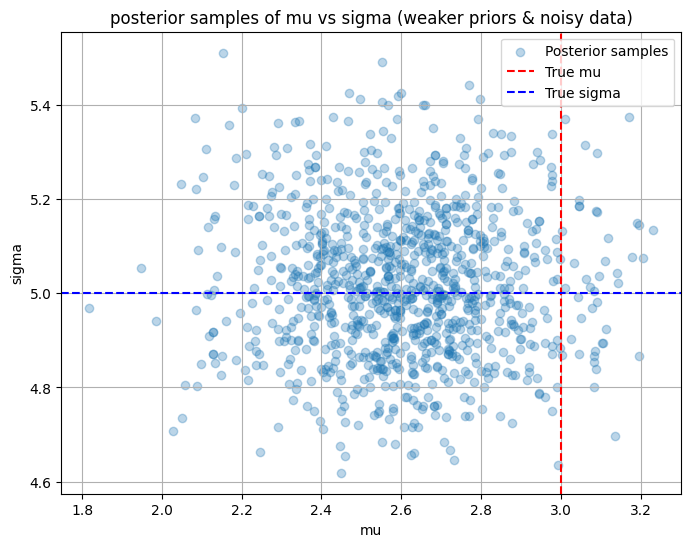

In [12]:
# true values
true_mu = 3.0
true_sigma = 5.0 

# generate synthetic data
data = np.random.normal(loc=true_mu, scale=true_sigma, size=500)  # larger, more varied dataset

# model with weak priors
def model(data):
    mu = numpyro.sample("mu", dist.Normal(0, 100))  # weak prior
    sigma = numpyro.sample("sigma", dist.HalfNormal(50.0))  # weak, flexible prior
    with numpyro.plate("data", len(data)):
        numpyro.sample("obs", dist.Normal(mu, sigma), obs=data)


# prepare and run MCMC
#
# DEFINITIONS:
# ---------------
# NUTS (No-U-Turn Sampler)
#   - Monte Carlo sampling method used to explore complex posterior distributions efficiently
# MCMC (Markov Chain Monte Carlo)
#   - Family of algorithms for sampling complex probability distributions
#   - Instead of computing the p(data), which is hard, let's just sample a bunch of times 
#     from the posterior to estimate the parameters
#   - A Markov chain is a sequence of states (param values here) where each one depends only
#     the previous one. MCMC uses this to explore param value possibilites but starting
#     somewhere in the param space and "walking around," accepting or discarding new param
#     values based on likeliness. Eventually, we settle on values.

# run MCMC
nuts_kernel = NUTS(model)
mcmc = MCMC(nuts_kernel, num_warmup=500, num_samples=1000)
mcmc.run(jax.random.PRNGKey(1), data=jnp.array(data))
posterior_samples = mcmc.get_samples()
mcmc.print_summary()

# plot mu vs sigma samples
mu_samples = posterior_samples["mu"]
sigma_samples = posterior_samples["sigma"]

plt.figure(figsize=(8, 6))
plt.scatter(mu_samples, sigma_samples, alpha=0.3, label="Posterior samples")
plt.axvline(true_mu, color='red', linestyle='--', label='True mu')
plt.axhline(true_sigma, color='blue', linestyle='--', label='True sigma')
plt.xlabel("mu")
plt.ylabel("sigma")
plt.title("posterior samples of mu vs sigma (weaker priors & noisy data)")
plt.legend()
plt.grid(True)
plt.show()

We see that our predicted mu and sigma are pretty inaccurate relative to where the actual mu and sigma lie. Why is this? 

It's because our priors on the parameters of h are really wide. 

if are priors are:
   - weak but realistic, and the data is not noisy, our posterior accuracy will good
   - strong but realistic, and the data is not noisy, our posterior accuracy will be accurate (priors help here)
   - strong but wrong, and the data is phenomonal, our posterior will be inaccurate

Setting priors on h is very important and can make or break your results. We don't want to be too loose, and we don't want to be too strict as well. Let's try again with more reasonable priors and see if our results are better.

In [13]:
# pick the true mu and sigma
true_mu = 3.0
true_sigma = 1.5

# generate synthetic data
np.random.seed(0)
data = np.random.normal(loc=true_mu, scale=true_sigma, size=100)

# define model
def model(data):
    mu = numpyro.sample("mu", dist.Normal(0, 10))  # loose prior
    sigma = numpyro.sample("sigma", dist.HalfNormal(5.0))  # loose prior
    # repeat len(data) times, taking independent samples from data
    with numpyro.plate("data", len(data)):
        numpyro.sample("obs", dist.Normal(mu, sigma), obs=data)


In [14]:
nuts_kernel = NUTS(model)  # create kernel 
mcmc = MCMC(nuts_kernel, num_warmup=500, num_samples=1000)  # wrap with MCMC sampler
mcmc.run(jax.random.PRNGKey(0), data=jnp.array(data))  # run
mcmc.print_summary()

sample: 100%|██████████| 1500/1500 [00:02<00:00, 566.00it/s, 3 steps of size 9.87e-01. acc. prob=0.88] 


                mean       std    median      5.0%     95.0%     n_eff     r_hat
        mu      3.09      0.15      3.10      2.84      3.34   1090.50      1.00
     sigma      1.53      0.11      1.52      1.36      1.71   1205.63      1.00

Number of divergences: 0


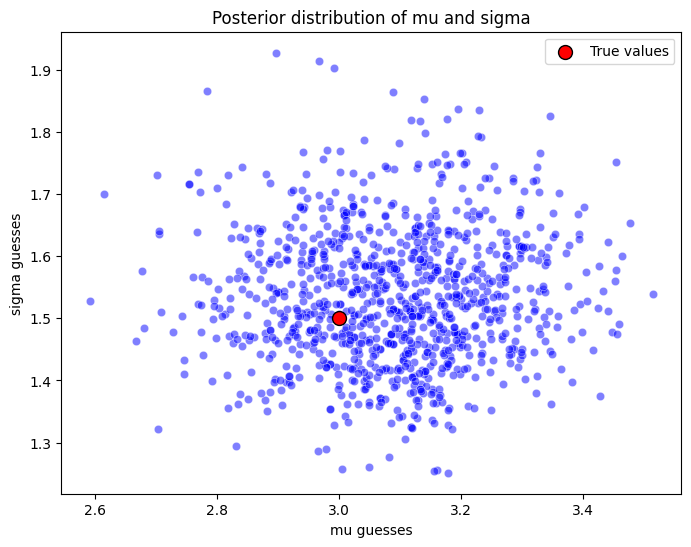

In [15]:
# get posterior samples
posterior_samples = mcmc.get_samples()
mu_samples = posterior_samples["mu"]
sigma_samples = posterior_samples["sigma"]

# plots
plt.figure(figsize=(8, 6))
sns.scatterplot(x=mu_samples, y=sigma_samples, color='blue', alpha=0.5)
plt.scatter(true_mu, true_sigma, color='red', label="True values", s=100, edgecolor='black')
plt.title("Posterior distribution of mu and sigma")
plt.xlabel("mu guesses")
plt.ylabel("sigma guesses")
plt.legend()
plt.show()

We see that our prediction is much more accuarte, given the data. Nice.

Let's now try this using a more complicated h and on real data, not synthetic data.

INSERT HERE